## Улучшение визуального восприятия изображений

Исполнитель:

In [1]:
#Загрузка библиотек
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
#Вспомогательные функции

# Гистограмма распределения данных каналов. Для оси y используется логарифмическая шкала
# val - массива данных двух каналов
# title - подпись к графикам каждого из каналов
def show_hist(val, title):
    plt.figure(figsize=(10, 5))
    hist, bins = np.histogram(val, bins=50)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.xlabel(title)    
    plt.yscale('log')
    plt.show()
    
    
# Вывод данных в виде изображения
# data - массив данных
# title - подпись к изоюражению
# size - размер подложки
def show_img(data, title, size = 15, cmap = plt.cm.cividis):
    plt.figure(figsize=(size, size))
    plt.imshow(data, cmap = cmap) #cividis #tab20c
    plt.xlabel(title)
    plt.show()

    
def show_gray(data, title ="", size = 10):
    plt.figure(figsize=(size, size))
    plt.imshow(data, cmap=plt.cm.gray)
    plt.xlabel(title)
    #plt.colorbar()
    plt.show()

## Создание RGB

In [3]:
from netCDF4 import Dataset

In [4]:
# Формула Планка
def brigthness_temp(var):
    """ Compute the brightness temperature given input data, which should be 
        relative to the infrared channels of SEVIRI. The channel number is read
        from the NETCDF variable name, so that the correct coefficients for the
        conversions are used. 
        
        TO-DO. Check before if the value is masked. This should be a problem if
        the domain extends somehwere outside the satellite POV."""
    
    
    channels = {
        'ch4':{'nu_c':2569.094, 'A':0.9959, 'B':3.471},
        'ch5':{'nu_c':1598.566, 'A':0.9963, 'B':2.219},
        'ch6':{'nu_c':1362.142, 'A':0.9991, 'B':0.485},
        'ch7':{'nu_c':1149.083, 'A':0.9996, 'B':0.181},
        'ch8':{'nu_c':1034.345, 'A':0.9999, 'B':0.060},
        'ch9':{'nu_c':930.659 , 'A':0.9983, 'B':0.627},
        'ch10':{'nu_c':839.661, 'A':0.9988, 'B':0.627},
        'ch11':{'nu_c':752.381, 'A':0.9981, 'B':0.576}
             }
    
    # these are universal
    C1 = 1.19104E-5
    C2 = 1.43877
    
    nu_c = channels[var.name]['nu_c']
    A = channels[var.name]['A']
    B = channels[var.name]['B']
    
    temp_b = ( (C2*nu_c)/(A*np.ma.log((C1*nu_c**3/var[:])+1)) ) - (B/A)
    
    temp_b = temp_b
    
    return(temp_b)

In [5]:
# Чтение данных из файла в формате NetCDF
# data_file - название файла
# var_name - название считываемой переменной
def only_data_grab(data_file, var_name):    
    # designate dataset
    nc = Dataset(data_file, 'r')
    var_names = [ii for ii in nc.variables]
    #print(var_names)
    #var_name = var_names[0]

    if (var_name in ['ch1', 'ch2', 'ch3', 'ch12']) :
        # data info    
        data = nc.variables[var_name][:]    
    else:
        #Plank
        data = brigthness_temp(nc.variables[var_name])    
    
    # close file when finished
    nc.close()
    nc = None
    
    return data[::-1]#np.fliplr(data[::-1]) 

In [6]:
# TODO Укажите название файла в кавычках
file = "../data/SEVIRI_C_EUMG_20190803103009.nc"



In [7]:
# TODO прочитайте данные необходимых каналов в переменные с помощью функции only_data_grab (см. в начале файла)
# пример чтения данных 8 канала 9.7 мкм: ch97 = only_data_grab(file, "ch8")
ch62 = only_data_grab(file,"ch5")
ch97 = only_data_grab(file,"ch8")
ch108 = only_data_grab(file,"ch9")
ch73 = only_data_grab(file, "ch6")

#TODO Выведите минимальное и максимальное значения каждого канала
print("min =", np.min(ch62), "max =", np.max(ch62))
print("min =", np.min(ch73), "max =", np.max(ch73))
print("min =", np.min(ch97), "max =", np.max(ch97))
print("min =", np.min(ch108), "max =", np.max(ch108))



<ipython-input-4-8a176c07921e>:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  temp_b = ( (C2*nu_c)/(A*np.ma.log((C1*nu_c**3/var[:])+1)) ) - (B/A)


min = 187.8076038269634 max = 259.4285111938467
min = 185.94444884580668 max = 277.9473354654692
min = 200.52188322576043 max = 290.54134604936075
min = 184.1638914579233 max = 330.43220860616975


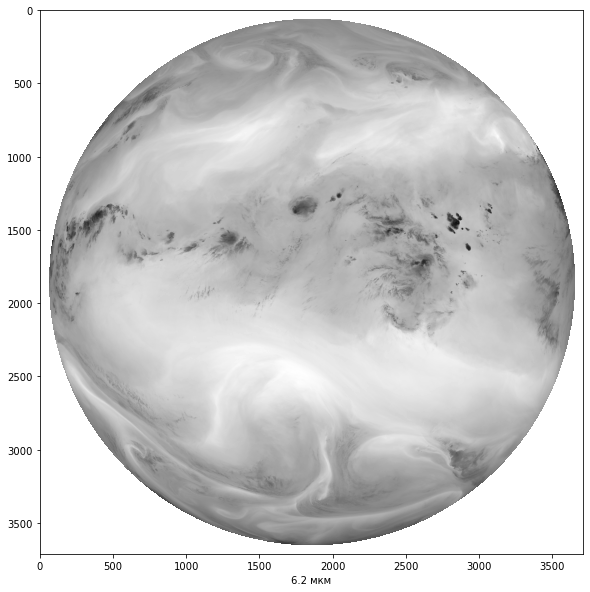

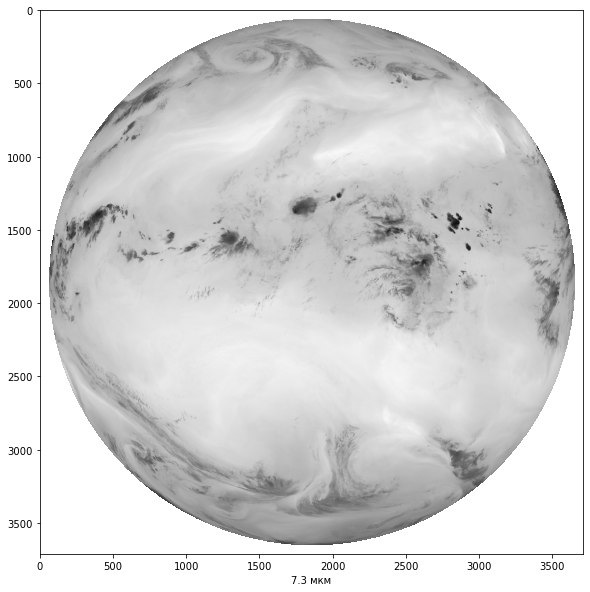

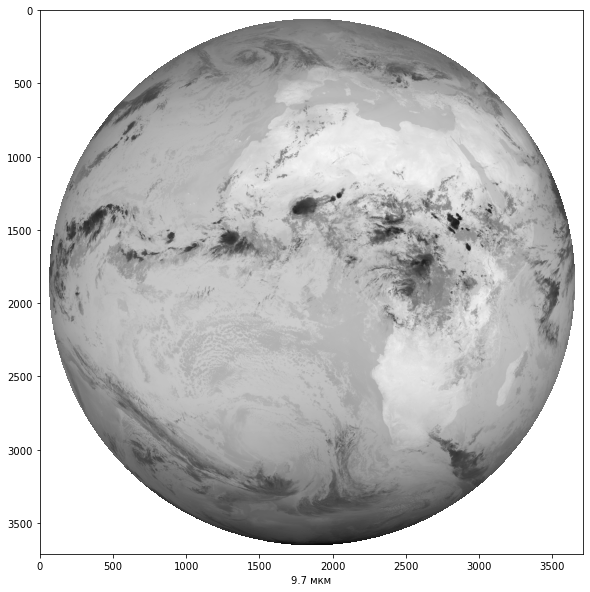

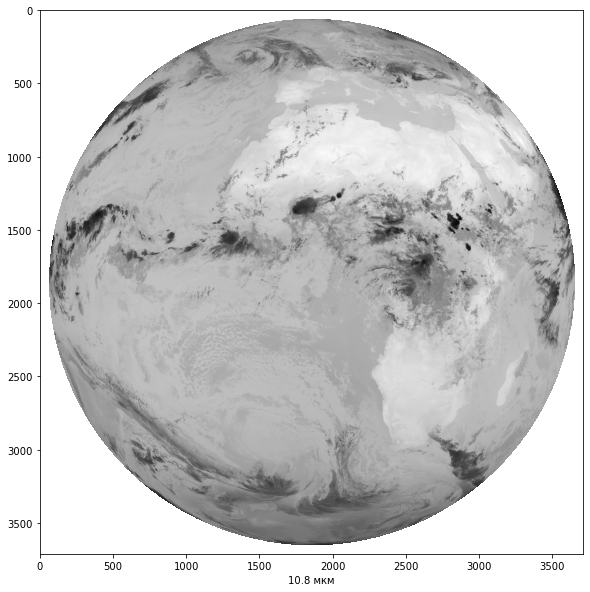

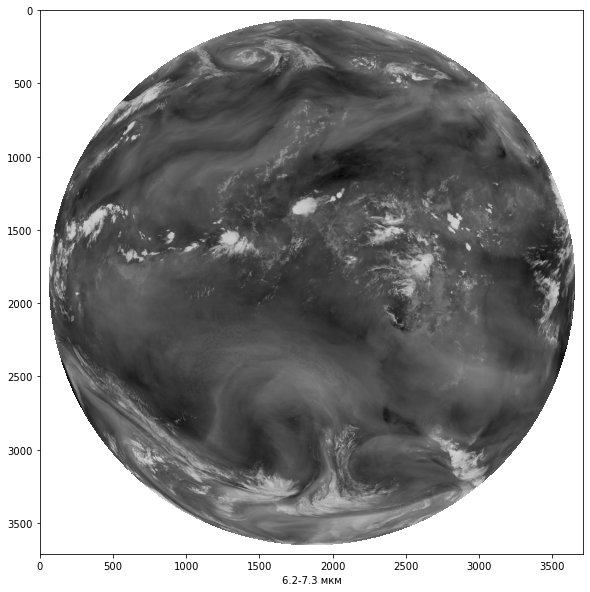

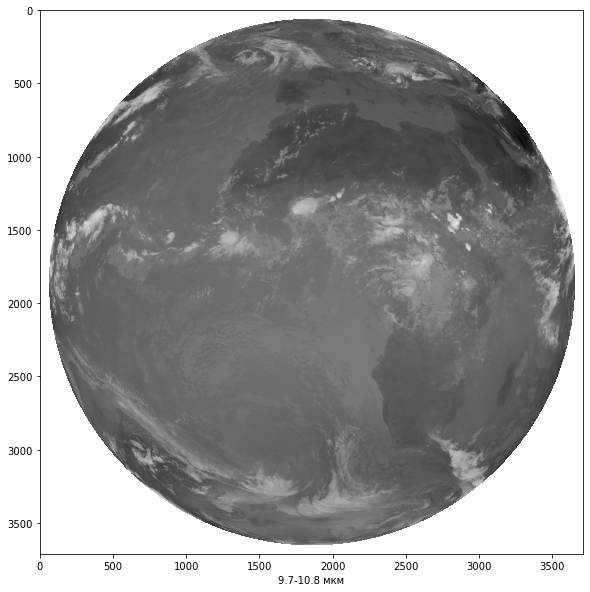

In [8]:
# TODO выведите считанные данные в виде изображений с помощью функции show_gray (см. в начале файла)
# пример отображения данных переменной ch97: show_gray(ch97, "9.7 мкм")

show_gray(ch62, "6.2 мкм")
show_gray(ch73, "7.3 мкм")
show_gray(ch97, "9.7 мкм")
show_gray(ch108, "10.8 мкм")
show_gray(ch62-ch73, "6.2-7.3 мкм")
show_gray(ch97-ch108, "9.7-10.8 мкм")

In [9]:
#TODO Допишите определение функции расчёта данных цветового канала
# ch - массив данных
# min, max - табличные минимальное и максимальное значение данных (см. документацию Табл.1 и свой вариант)
# gamma - табличне значение гамма-коррекции
def modify(ch, min, max, gamma):
    #обрежем массив по табличным пределам
    if (min < max) :
        ch = ch.clip(min, max) 
    else:
        ch = ch.clip(max, min) 
    #TODO Напишите формулу для преобразования данных массива (стр. 3 документации)
    #Учесть, что необходимо приведение к масштабу 0-1 для последующего преобразования в изображение
    res = ((ch-min)/(max-min))**(1/gamma)
    return res

In [10]:
#Создание цветосинтезированного изображения

#TODO Определите составляющие цветовой модели RGB
r = modify(ch62 - ch73, -25, 0, 1)
g = modify(ch97 - ch108, -40, 5, 1)
b = modify(ch62, 243, 208, 1)



In [11]:
res = np.array( [r.T, g.T, b.T]).T

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


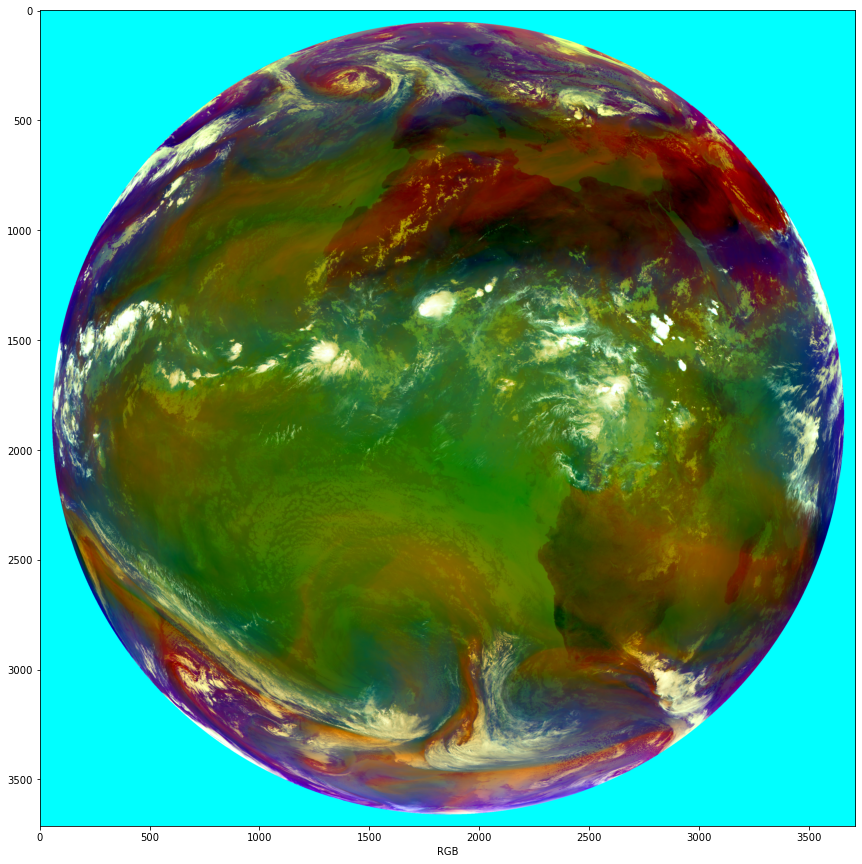

In [12]:
# TODO выведите считанные данные в виде изображения с помощью функции show_img (см. в начале файла)
show_img(res,"RGB", 15)


## sandwich

In [14]:
from matplotlib.colors import ListedColormap
import to_palette as pal
cmap_ir11 = ListedColormap(pal.ir11_palette[::-1] / 255)

In [15]:
ch108 = only_data_grab(file,"ch9")
ch108.shape

<ipython-input-4-8a176c07921e>:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  temp_b = ( (C2*nu_c)/(A*np.ma.log((C1*nu_c**3/var[:])+1)) ) - (B/A)


(3712, 3712)

In [16]:

ch108  = ch108[1000:2000, 1500: 3000]

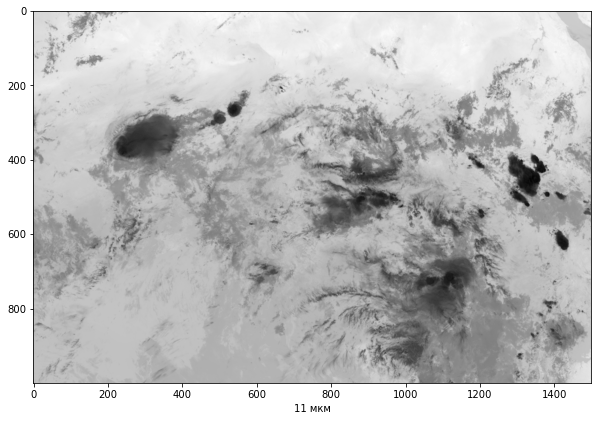

In [17]:
show_gray(ch108, "11 мкм")

In [18]:
chv = only_data_grab(file,"ch1")[1000:2000, 1500: 3000]

<ipython-input-5-4a3e1ae20e8c>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = nc.variables[var_name][:]


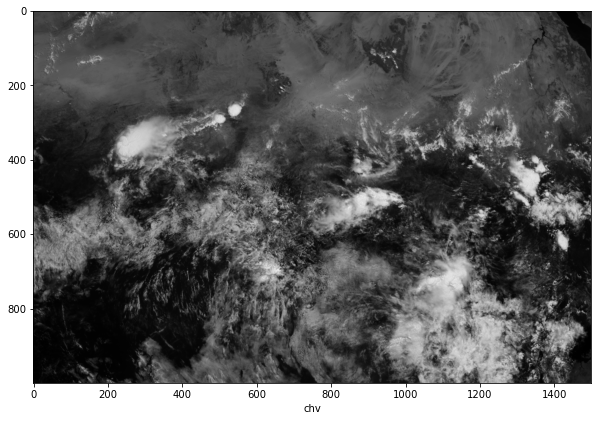

In [19]:
show_gray(chv, 'chv')

In [20]:
#chm = ch108.copy()
chm = np.ma.masked_greater(ch108, 240) #отбрасываем, где темпа больше 240

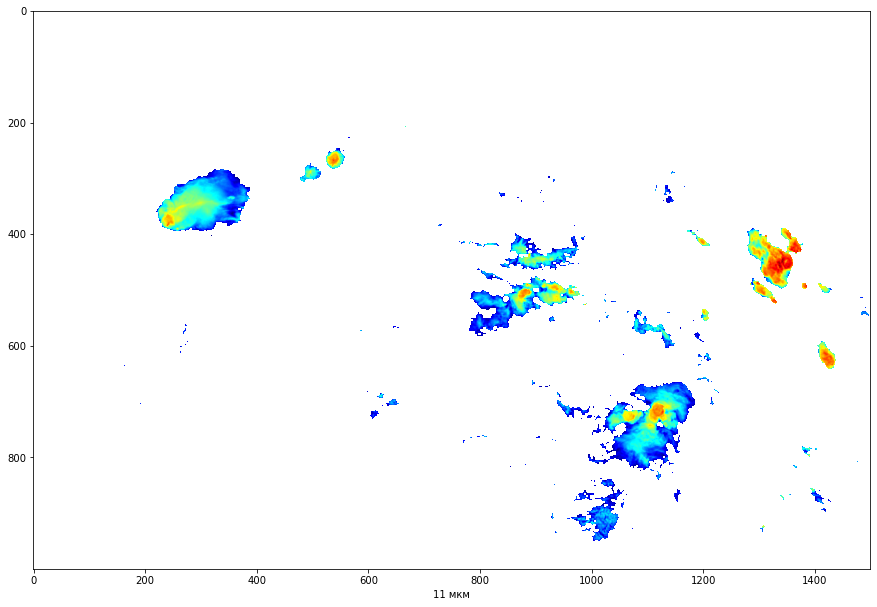

In [21]:
show_img(chm, "11 мкм", cmap = cmap_ir11)

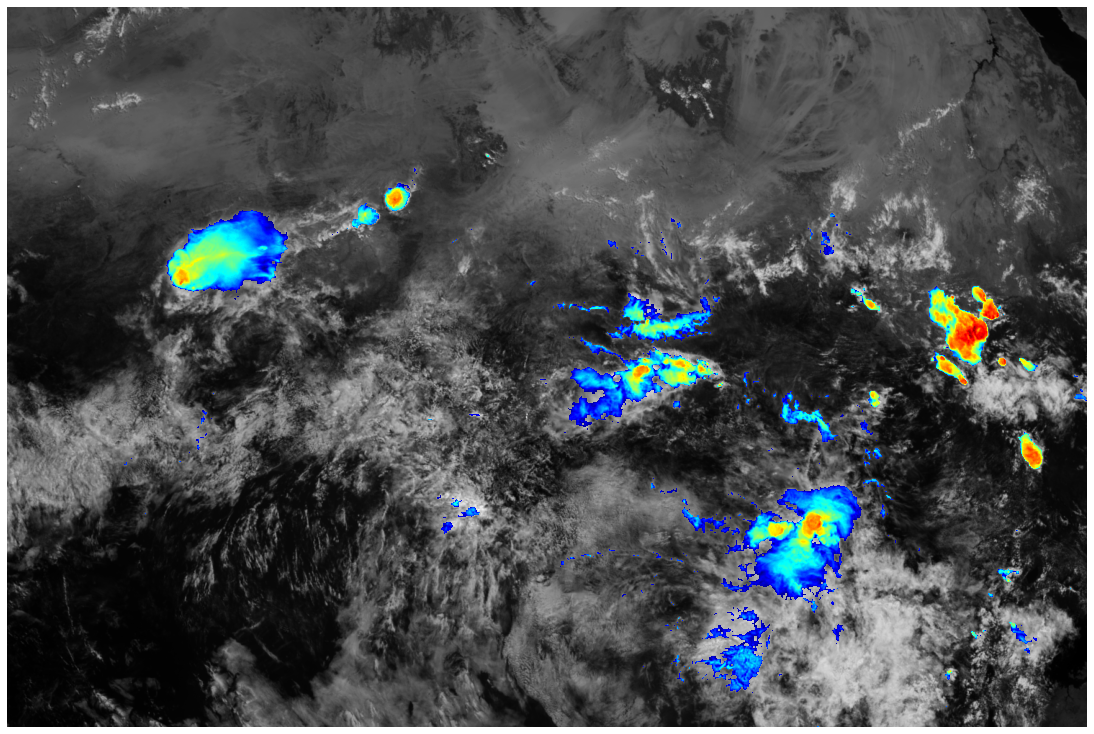

In [22]:
plt.figure(figsize=(15, 15))   
ax = plt.axes([0,0,1,1], frameon=False)
ax.set_axis_off()
plt.imshow(chv, cmap=plt.cm.gray)
plt.imshow(chm, cmap=cmap_ir11)
#plt.savefig(templ_name + '_' + str(row) + '_' + str(col) + 'full_ir.png', 
#            dpi=150, bbox_inches='tight', pad_inches=0)        

plt.show()
plt.close()

# Выравнивание гистограммы

In [23]:
#Чтение данных
chv = only_data_grab(file,"ch1")[700:1700, 700: 1700]

<ipython-input-5-4a3e1ae20e8c>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = nc.variables[var_name][:]


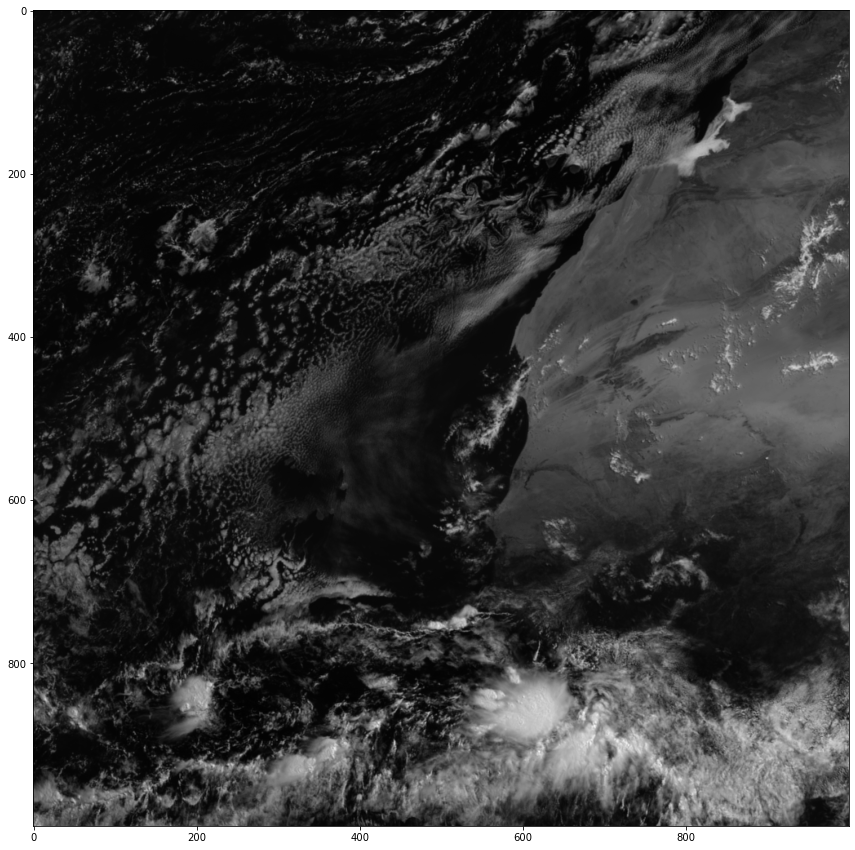

In [24]:
#Изображение
show_gray(chv, '', 15)

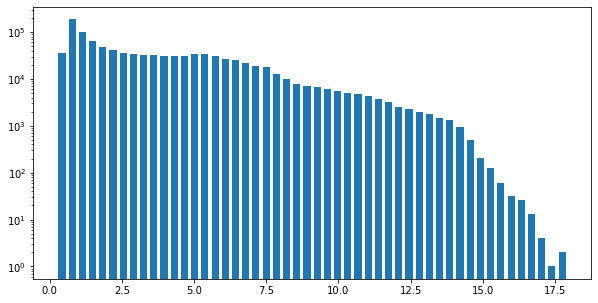

In [25]:
#Исходная гистограмма
show_hist(chv, '')

In [26]:
#Приведение данных к шкале 0-255

min = np.min(chv)
max = np.max(chv)

chimg = ((chv - min)*255/(max-min))

#К одномерному массиву
chimg = chimg.flatten().astype(np.ubyte)

In [27]:
#Создание пустых массивов для cfd и результата
cdf = np.zeros(256)
dst = np.empty_like(chimg)


#Выравнивание гистограммы

size = chimg.size


for i in range(0, size):
    cdf[chimg[i]] += 1
    
min = np.min(cdf)
for i in range(1, 256):    
    cdf[i] += cdf[i-1]

for i in range(0, size):
    dst[i] = cdf[chimg[i]]*255. / (size);
    #dst[i] = ((cdf[chimg[i]]-min)*255. / (size-min)) ;
    



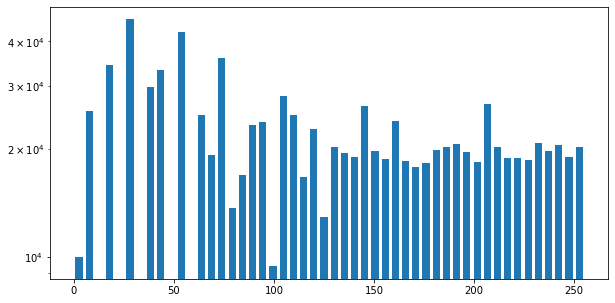

In [28]:
#Новая гистограмма
show_hist(dst, '')

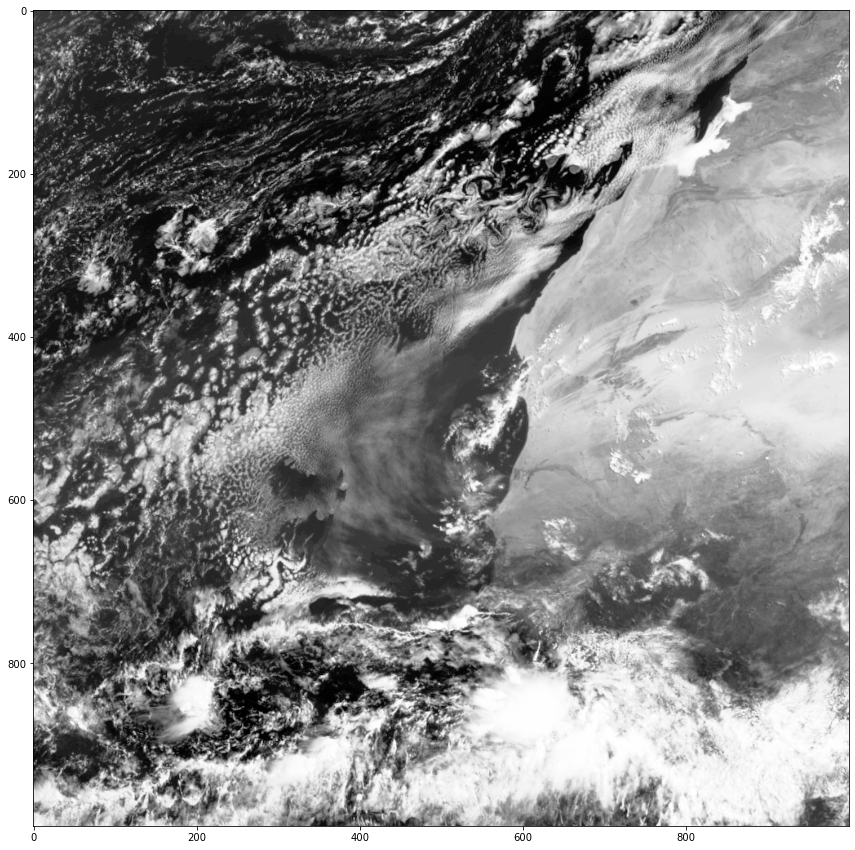

In [29]:
#В двумерный массив
dst = dst.reshape(chv.shape)

#Изображение с выровненной гистограммой
show_gray(dst, '', 15)